In [1]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/exercise_40_train.csv')
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


In [3]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 101 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       40000 non-null  int64  
 1   x1      40000 non-null  float64
 2   x2      40000 non-null  float64
 3   x3      40000 non-null  object 
 4   x4      40000 non-null  float64
 5   x5      37572 non-null  float64
 6   x6      40000 non-null  float64
 7   x7      40000 non-null  object 
 8   x8      40000 non-null  float64
 9   x9      40000 non-null  float64
 10  x10     40000 non-null  float64
 11  x11     34890 non-null  float64
 12  x12     40000 non-null  float64
 13  x13     40000 non-null  float64
 14  x14     30136 non-null  float64
 15  x15     40000 non-null  float64
 16  x16     28788 non-null  float64
 17  x17     40000 non-null  float64
 18  x18     40000 non-null  float64
 19  x19     40000 non-null  object 
 20  x20     40000 non-null  float64
 21  x21     40000 non-null  float64
 2

In [4]:
pd.set_option("max_rows", 100)
data[data.columns[data.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x5      37572 non-null  float64
 1   x11     34890 non-null  float64
 2   x14     30136 non-null  float64
 3   x16     28788 non-null  float64
 4   x22     37613 non-null  float64
 5   x24     36144 non-null  object 
 6   x26     37567 non-null  float64
 7   x30     7664 non-null   float64
 8   x33     32829 non-null  object 
 9   x38     37598 non-null  float64
 10  x41     30497 non-null  float64
 11  x42     30271 non-null  float64
 12  x44     5753 non-null   float64
 13  x45     31991 non-null  float64
 14  x49     27177 non-null  float64
 15  x52     23818 non-null  float64
 16  x54     27272 non-null  float64
 17  x55     22304 non-null  float64
 18  x57     7536 non-null   float64
 19  x61     32707 non-null  float64
 20  x63     37580 non-null  float64
 21  x64     34899 non-null  float64
 22

In [5]:

missing_variable=list()
for column in data[data.columns[data.isnull().any()]].columns:
    
    if 100*data[column].isnull().sum()/len(data)>40:
        print(f"Variable {column} is missing {100*data[column].isnull().sum()/len(data)}% of values")
        
        missing_variable.append(column)


Variable x30 is missing 80.84% of values
Variable x44 is missing 85.6175% of values
Variable x52 is missing 40.455% of values
Variable x55 is missing 44.24% of values
Variable x57 is missing 81.16% of values


Here we can decide what to do with our missing values. Most variables are missing <40%, in fact, only 5 variables are missing more than 40% of their values. Variables `x30`, `x44`, and `x57` will be dropped, as the are missing over 80% of the values. Variables `x52`, and `x55` will be kept for now.

In [6]:
data.drop(columns=['x30','x44','x57'], inplace=True)

In [7]:
data.select_dtypes('object')

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.0085%,$3750.51991954505,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.0077%,$448.867118077561,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.0216%,$834.95775080472,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,1e-04%,$-48.1031003332715,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


Variable `x7` reflect percentage, `x19` reflects dollar amounts. These will be converted to numeric. `x39` reflects ranges and will be converted to a ordinal variable. The other variables will converted to categorical variables:

In [8]:
#Converting numeric values to float
#Because we are dealing with negative numbers that are present as strings, we'll need to use regular expressions to convert the dash ("-") to a negative sign ("\u2212").
import re 
data['X7']= [round(float(re.sub(u"\u2212", "-", i.strip('%'))),8) for i in data['x7']]
data['X19']= [round(float(re.sub(u"\u2212", "-", i.strip('$'))),10) for i in data['x19']]

In [9]:
#Converting ranges & categorical to catergories 

data = data.astype({'x39':'category','x24':'category','x31':'category','x3':'category','x33':'category','x60':'category','x65':'category','x77':'category','x93':'category','x99':'category'})

Let's check for input inconsistencies in the categorical data:

In [10]:
for column in data.select_dtypes('category').columns:
    #with pd.option_context('display.max_rows', None, 'display.width', None):  # more options can be specified also
    print(f'{column}: {data[column].unique().tolist()}')

x3: ['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday', 'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon']
x24: ['female', 'male', nan]
x31: ['no', 'yes']
x33: ['Colorado', 'Tennessee', 'Texas', 'Minnesota', 'New York', 'Florida', 'Nebraska', 'California', nan, 'North Dakota', 'Arizona', 'Alabama', 'Ohio', 'Pennsylvania', 'Iowa', 'Indiana', 'Vermont', 'Arkansas', 'Massachusetts', 'Illinois', 'Georgia', 'West Virginia', 'Connecticut', 'Virginia', 'North Carolina', 'Montana', 'New Mexico', 'New Hampshire', 'Michigan', 'DC', 'Washington', 'Louisiana', 'Kentucky', 'Utah', 'Missouri', 'Oregon', 'Oklahoma', 'Nevada', 'Wisconsin', 'New Jersey', 'Maryland', 'Maine', 'Alaska', 'Idaho', 'Wyoming', 'Rhode Island', 'South Dakota', 'Mississippi', 'Kansas', 'Delaware', 'Hawaii', 'South Carolina']
x39: ['5-10 miles']
x60: ['August', 'April', 'September', 'January', 'December', 'March', 'July', 'November', 'June', 'February', 'October', 'May']
x65: ['farmers', 'allstate', 'ge

From the above:
- `x3` has inconsistencies witn the input format. This can be easily fixed.
- `x33` has 52 unique values. One of them is NaN and the other is DC (District of Columbia).
- `x39` only has one value. Therefore, we can drop this variable.
- `x99` only has 'yes' values, beside 'NaN'. Since I have limited knowledge on what this data is about, I will assume that NaN values are, in fact, 'no' values.


In [11]:
data.drop(columns=['x39'], inplace=True)

In [12]:
#Addressing inconsistencies in x3
data.x3.replace({'Fri': 'Friday',
 'Mon': 'Monday',
 'Sat': 'Saturday',
 'Sun': 'Sunday',
 'Thur': 'Thursday',
 'Tue': 'Tuesday',
 'Wed': 'Wednesday'}, inplace=True)
data.x3.unique()

array(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

In [13]:
#Addressing variable x99
data.x99 = data.x99.cat.add_categories(['no'])
data.x99.fillna('no', inplace=True)
data.x99.unique()

['yes', 'no']
Categories (2, object): ['yes', 'no']

Now let's check for duplicates:

In [14]:
data[data.duplicated()]

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x93,x94,x95,x96,x97,x98,x99,x100,X7,X19


# EDA

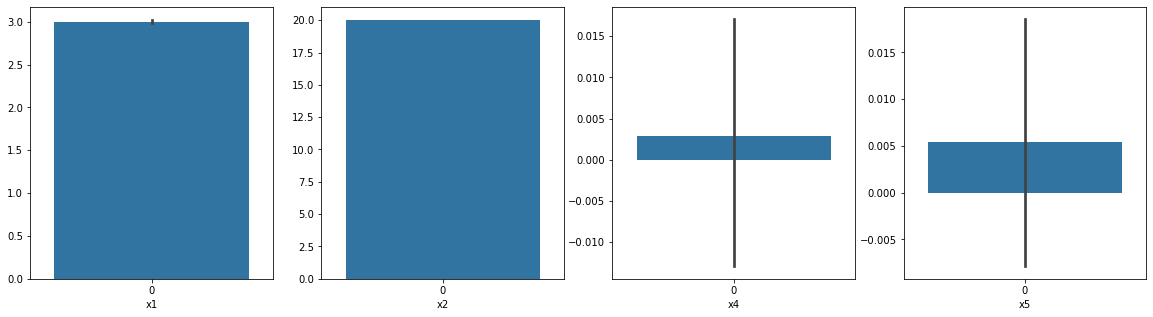

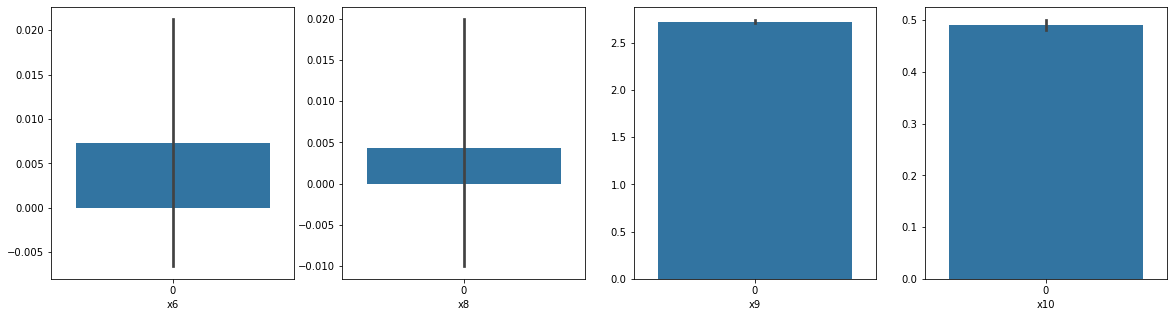

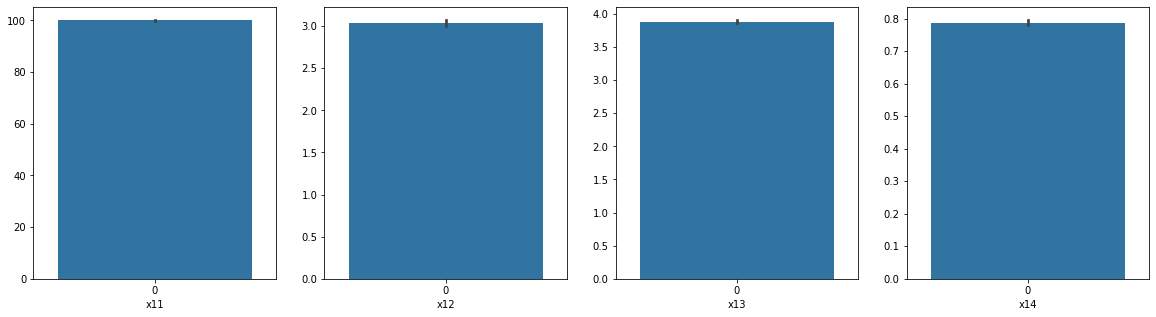

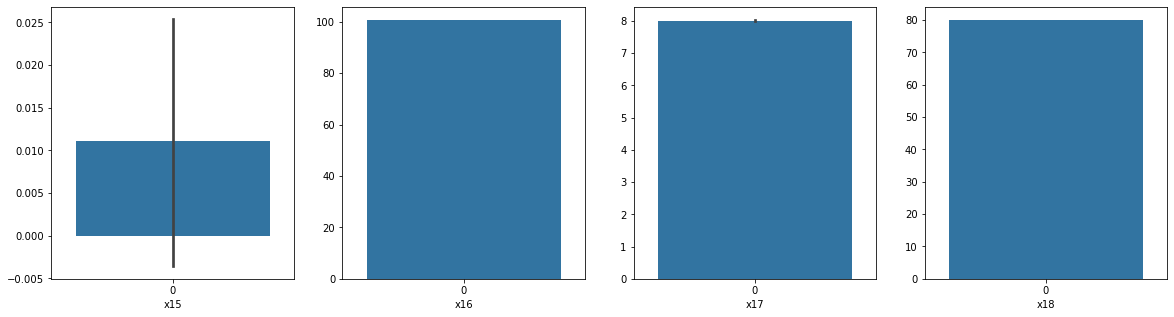

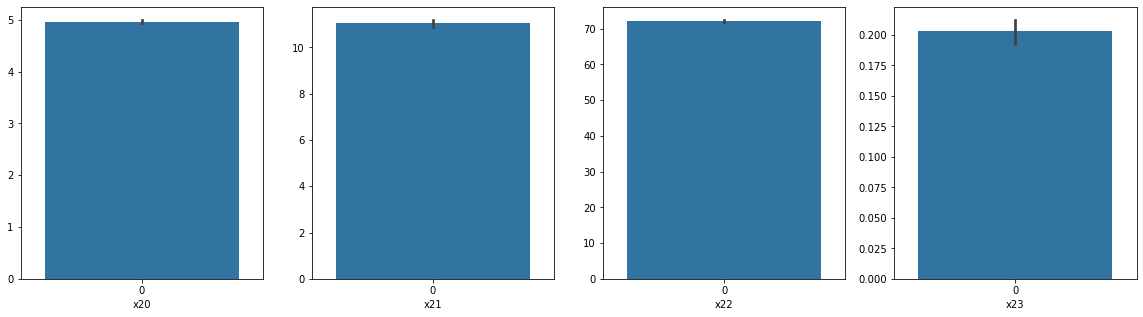

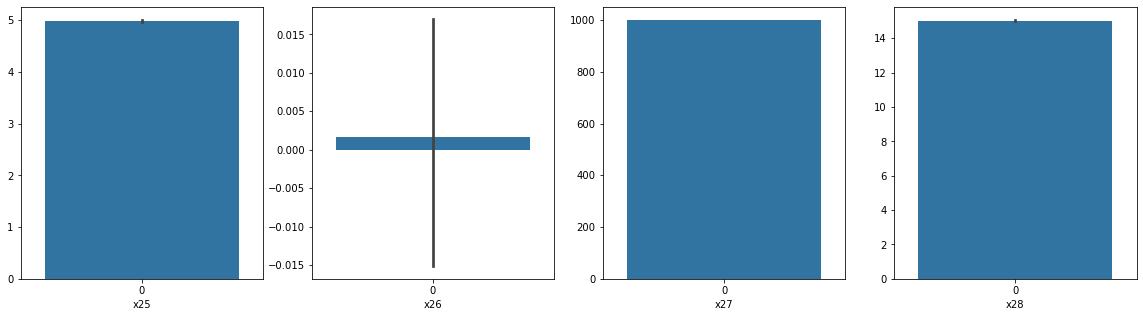

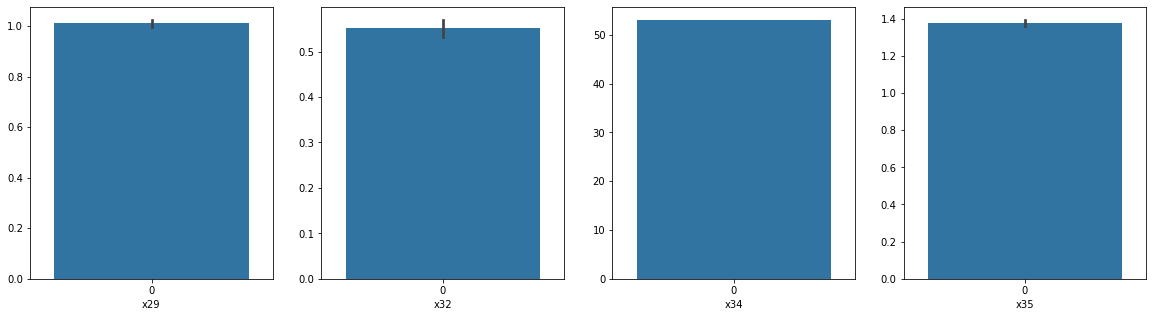

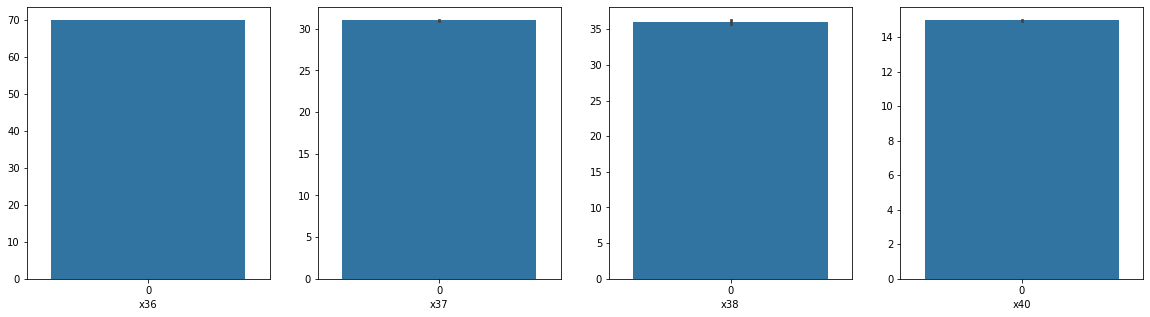

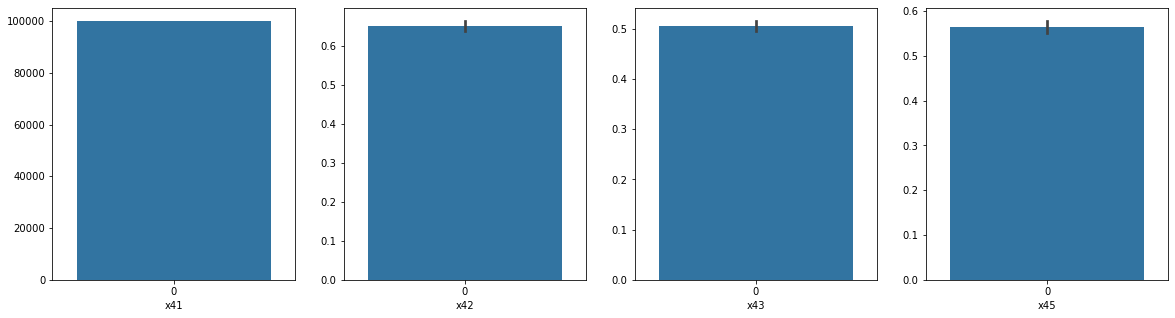

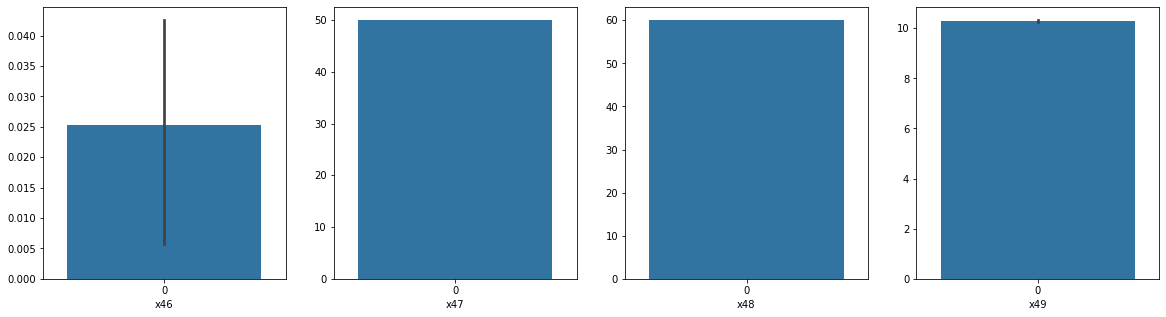

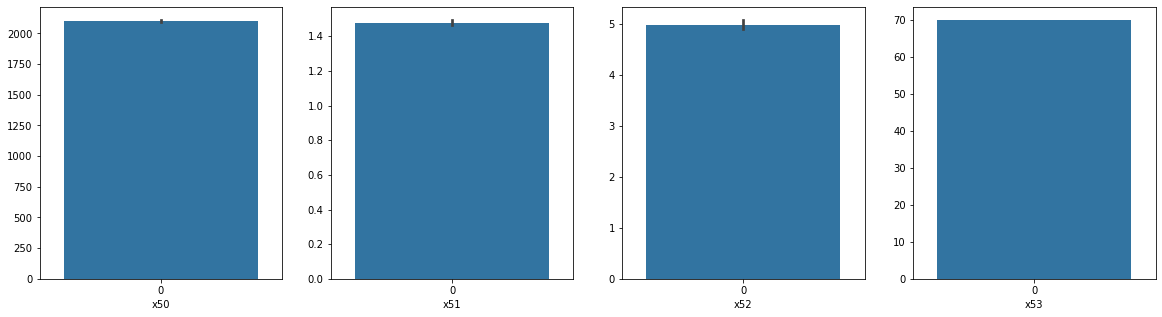

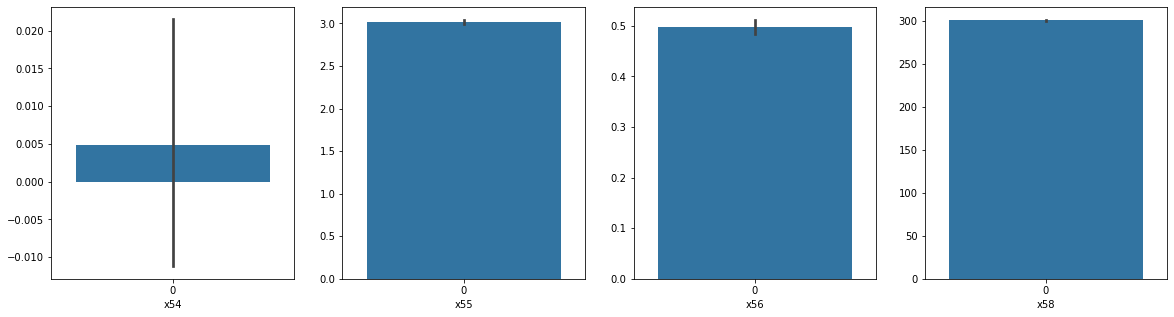

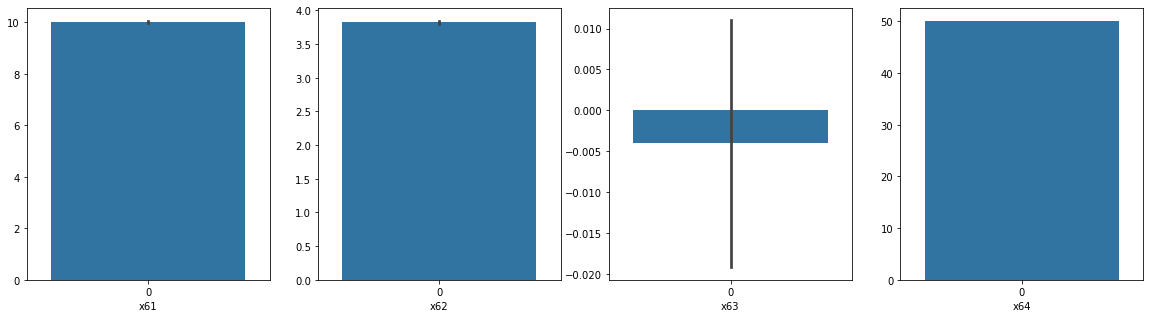

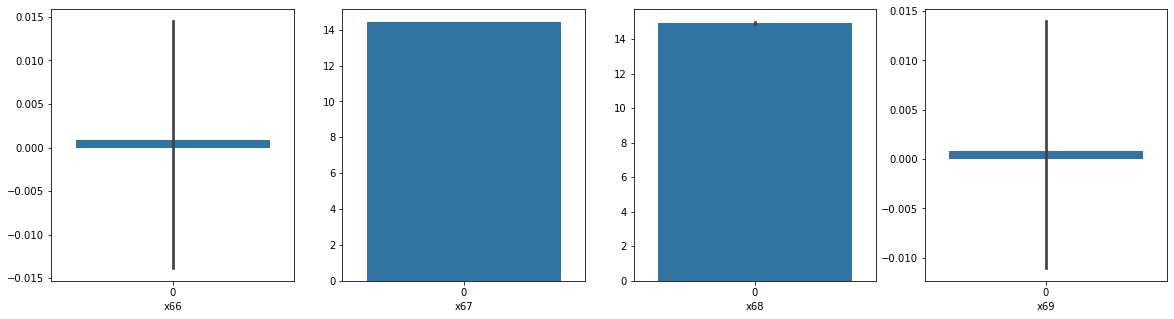

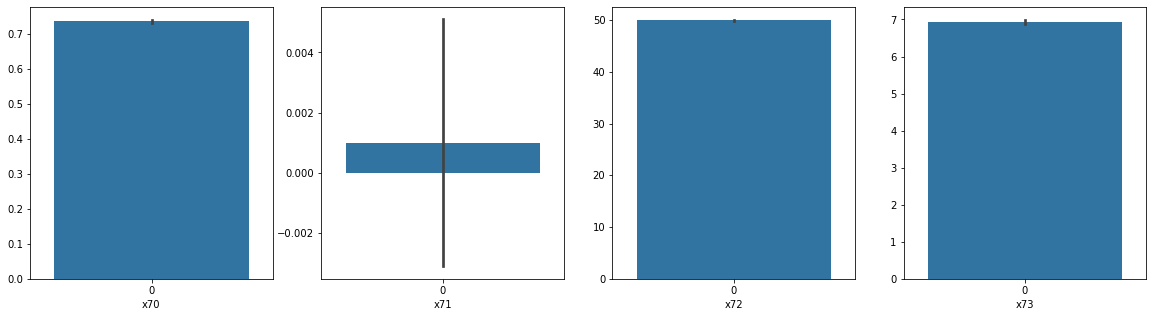

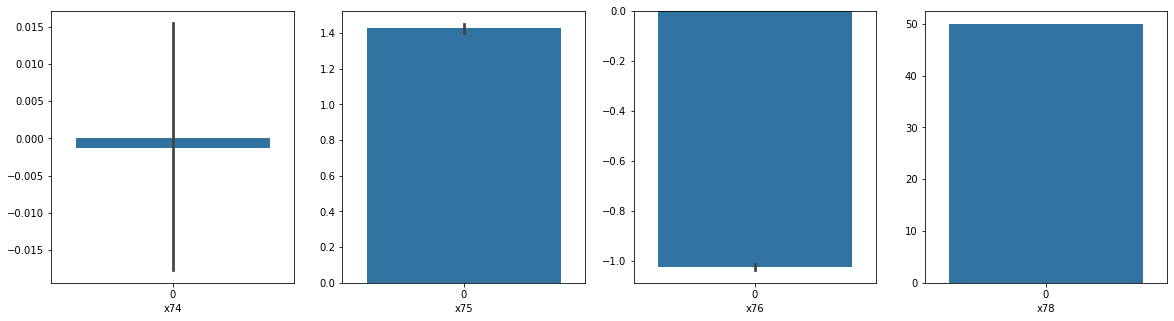

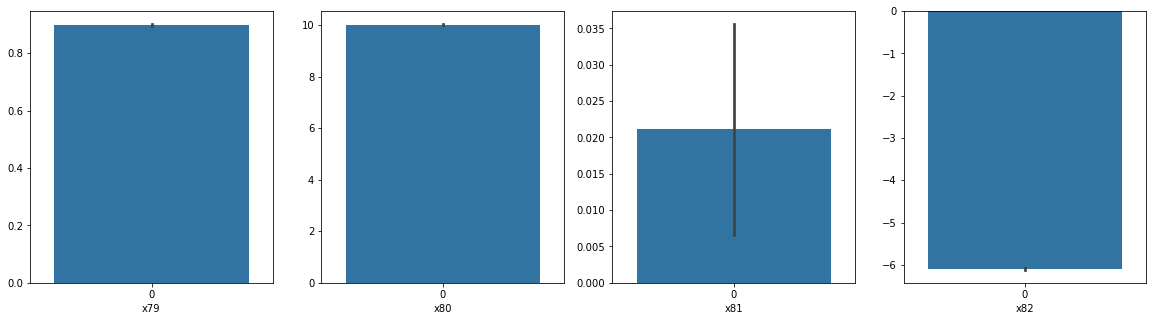

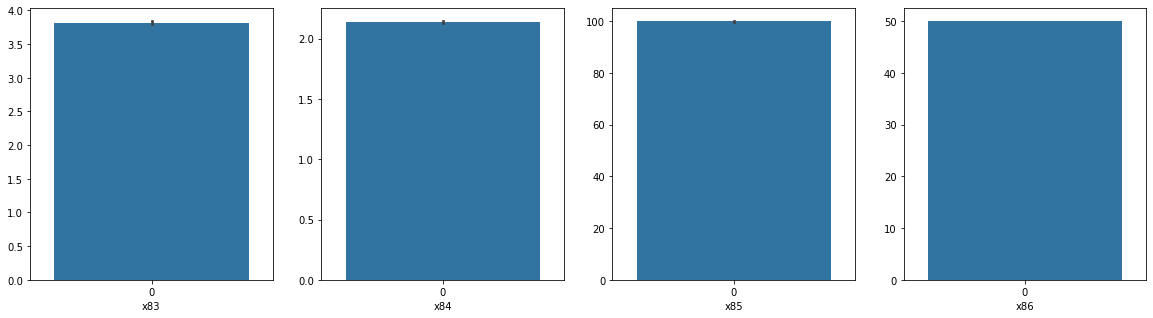

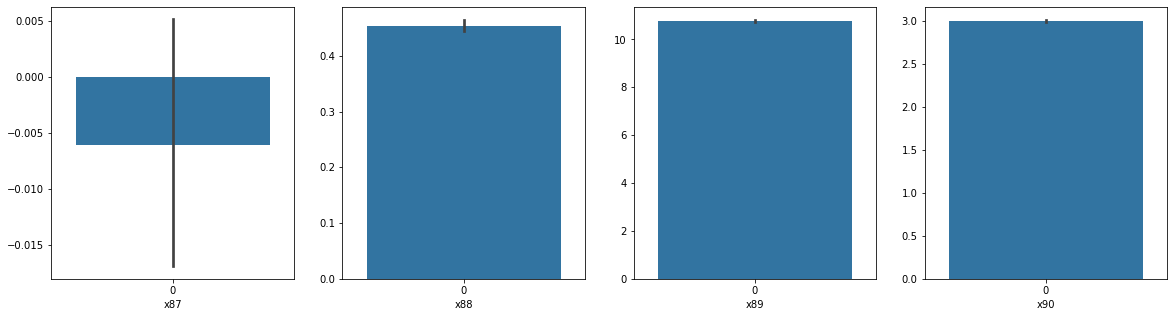

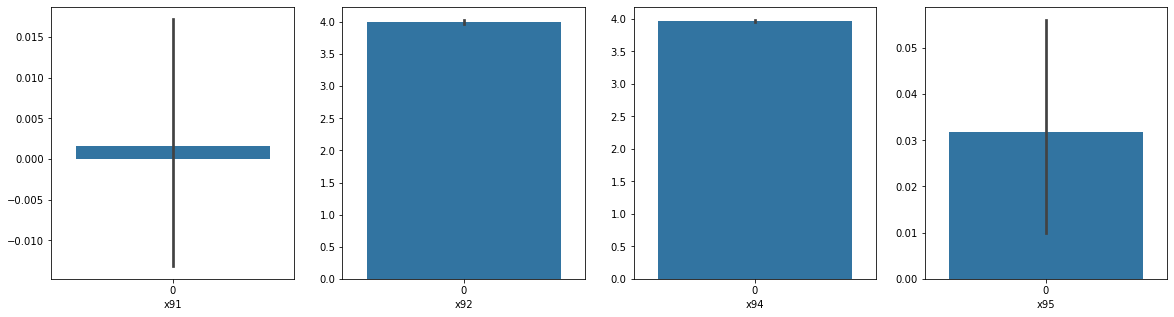

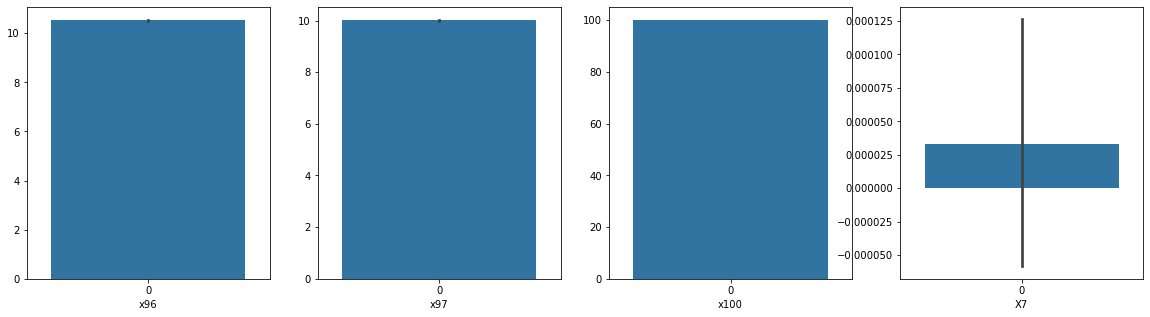

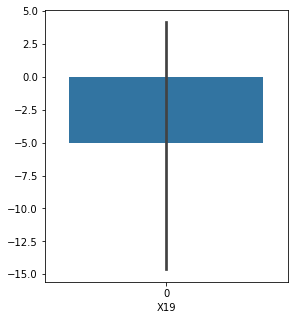

In [15]:
#Checking for outliers


fig = plt.figure(figsize=(20,5))

for plots, column in enumerate(data.select_dtypes(['float','int'])):

    if plots%4==0 and plots != 0:
        plt.show()
        fig = plt.figure(figsize=(20,5))

    fig.add_subplot(1,4,(plots%4)+1)
    sns.barplot(data=data[column])

    plt.xlabel(column)

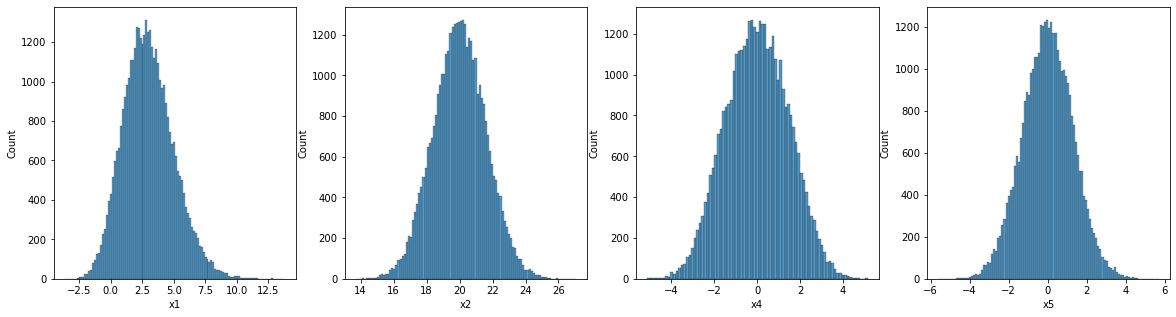

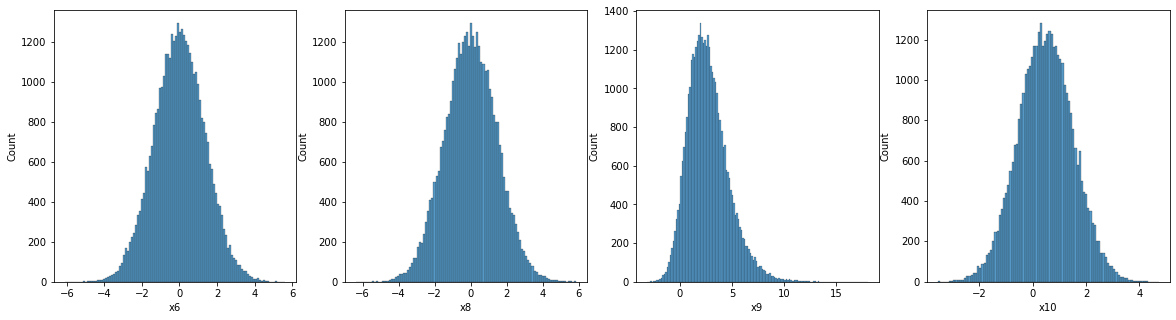

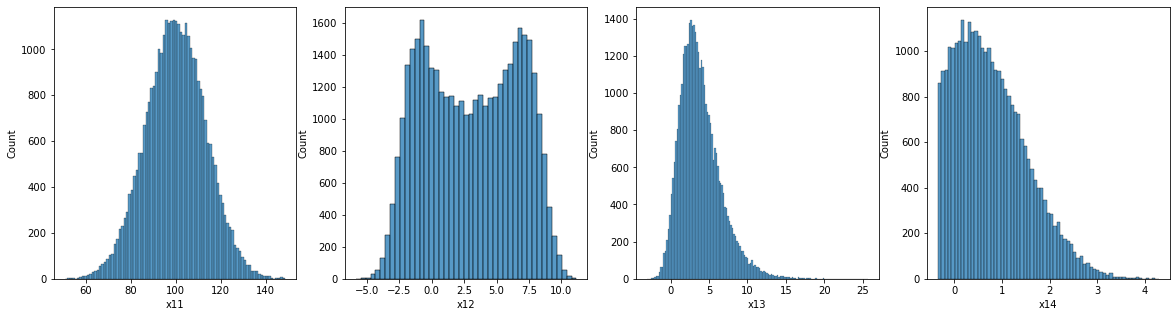

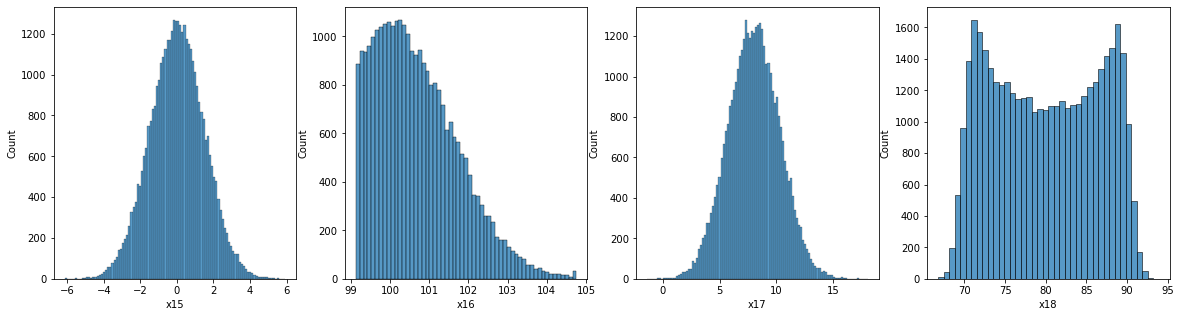

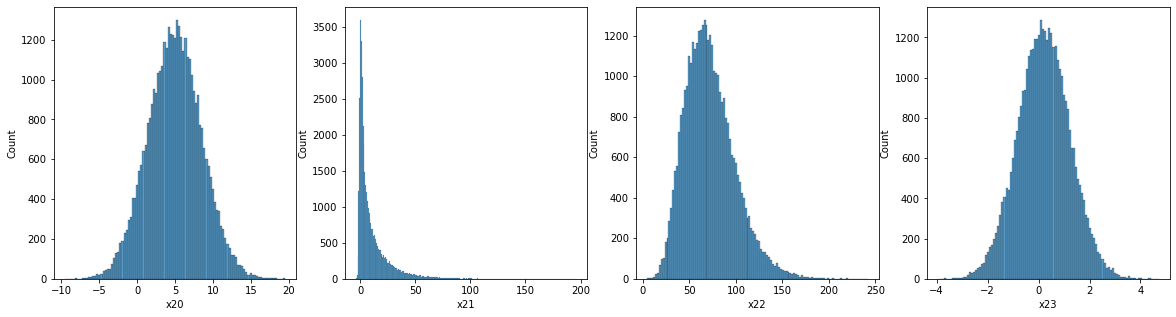

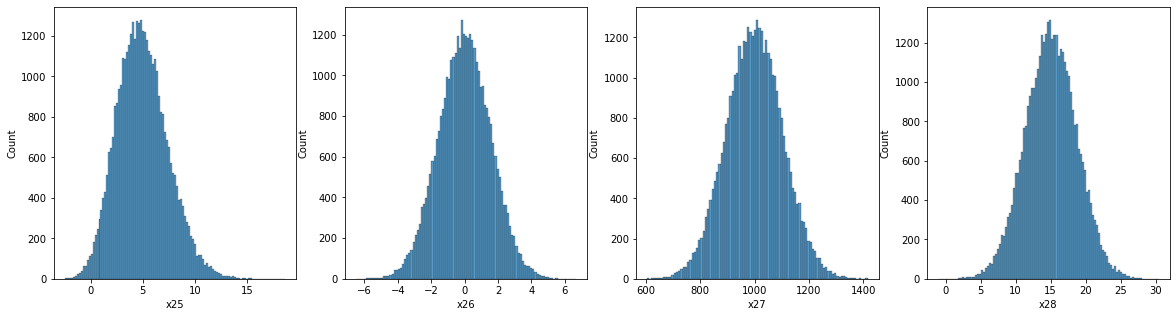

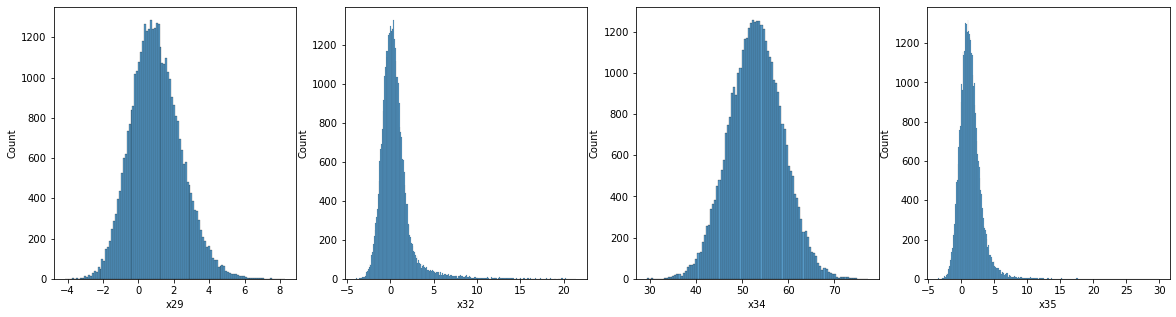

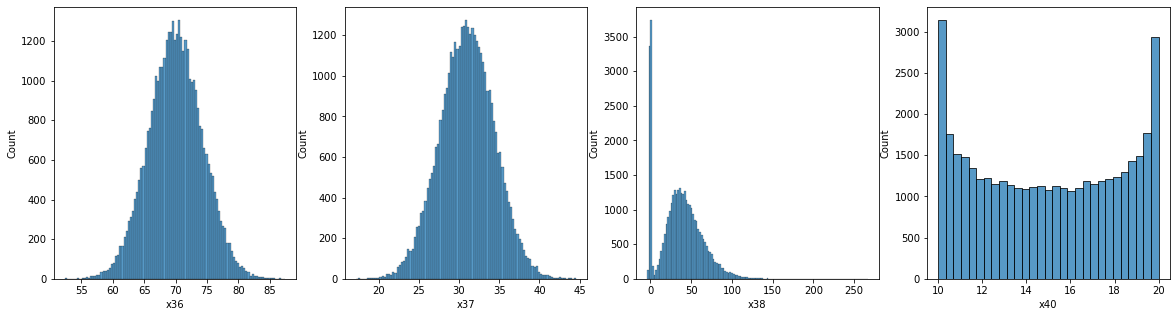

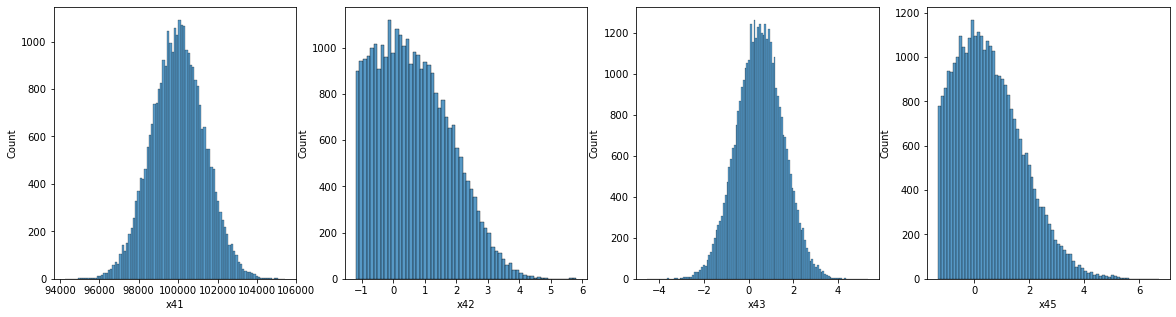

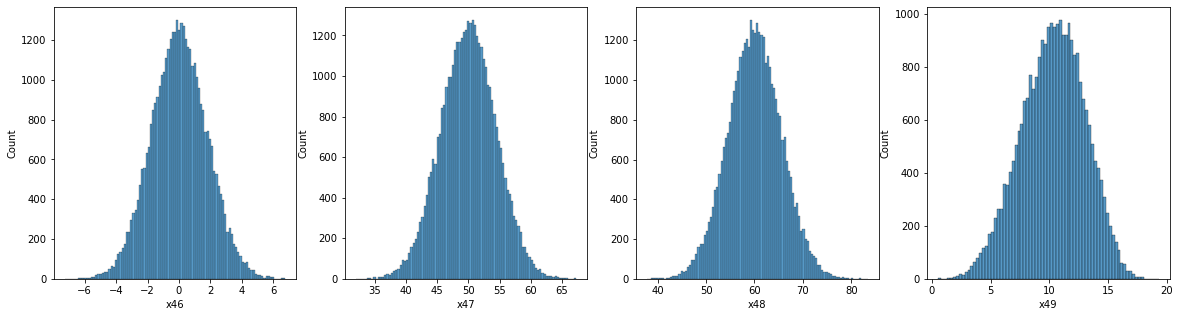

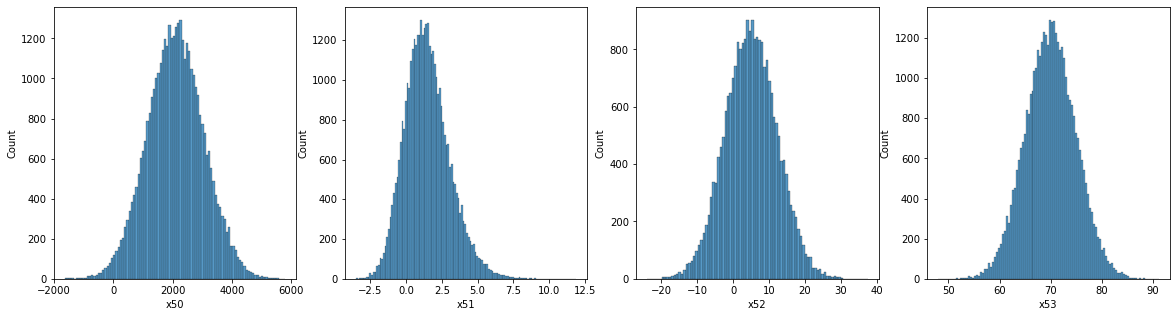

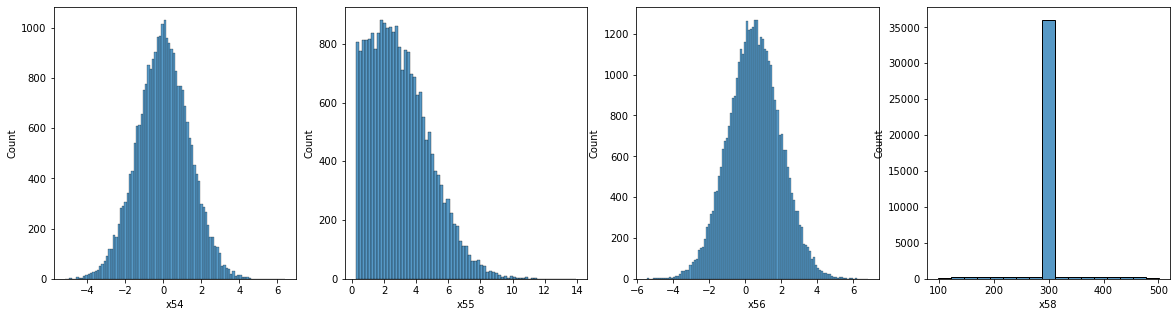

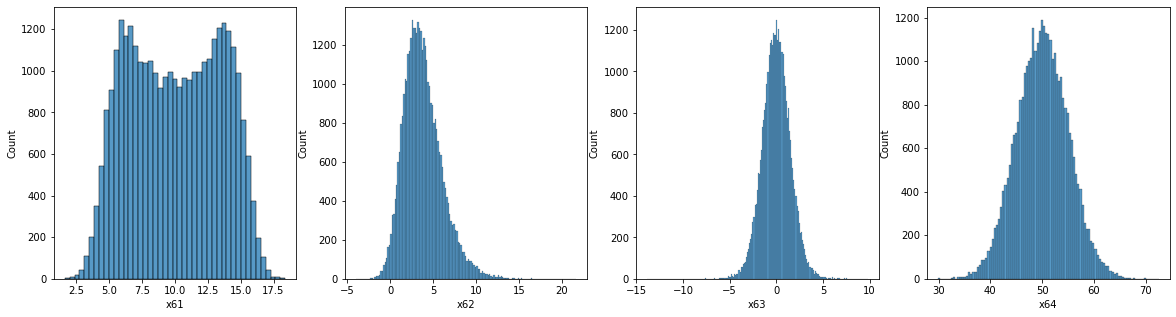

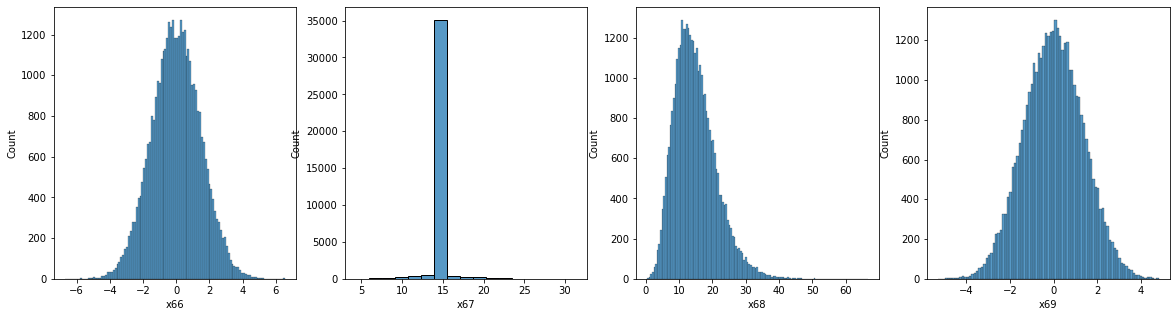

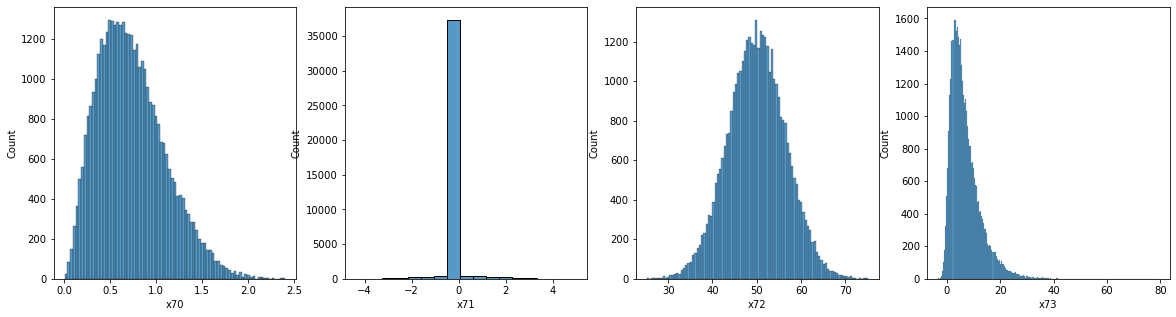

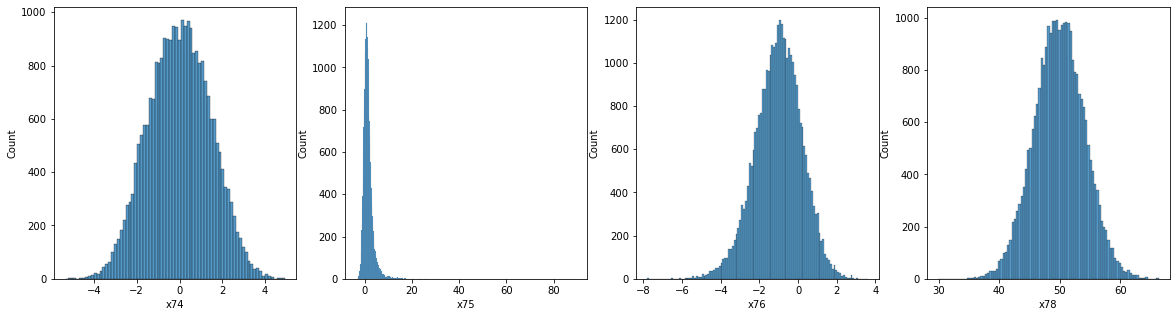

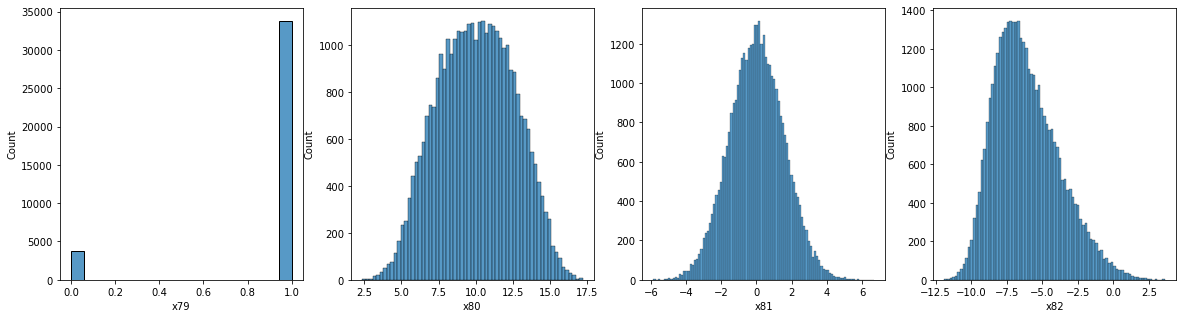

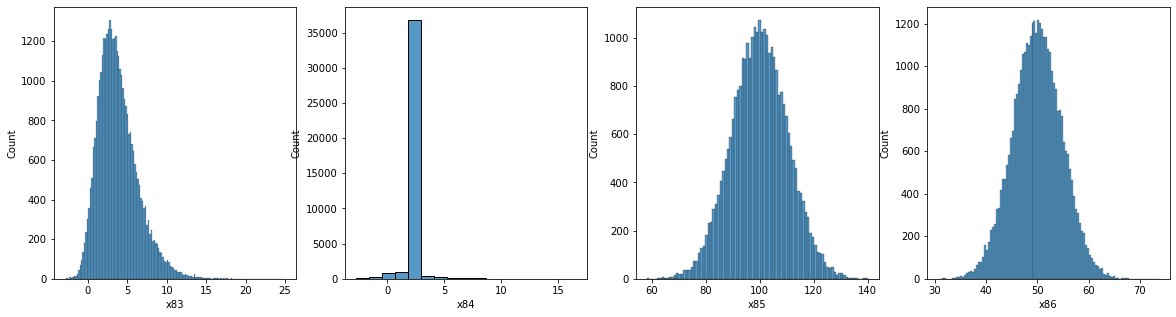

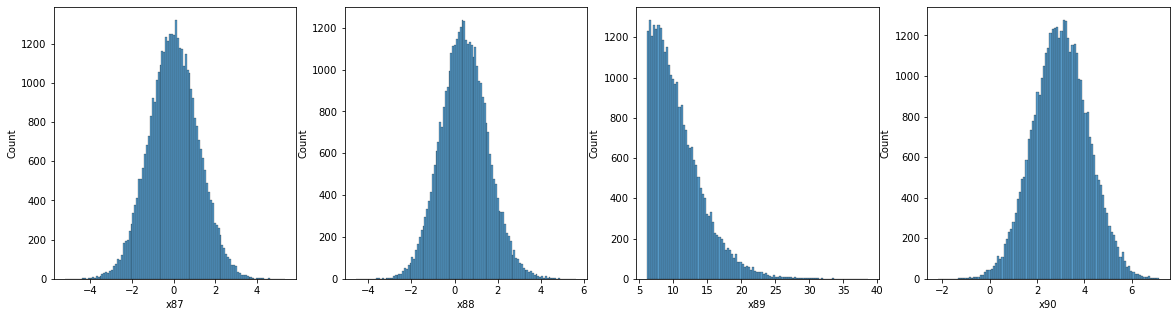

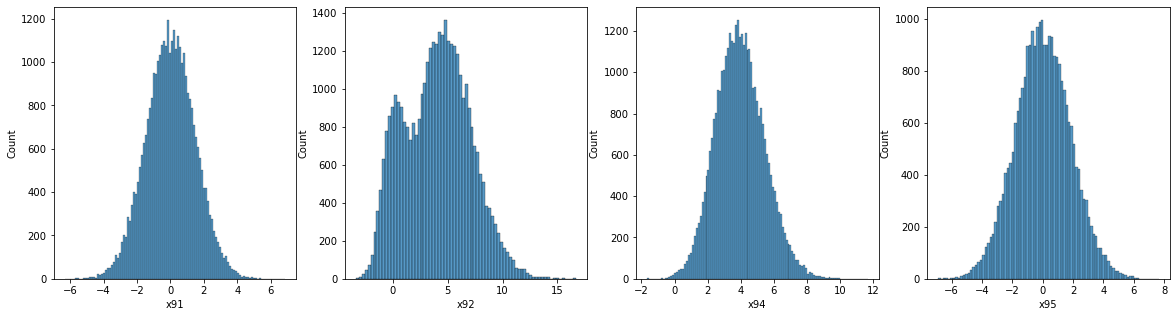

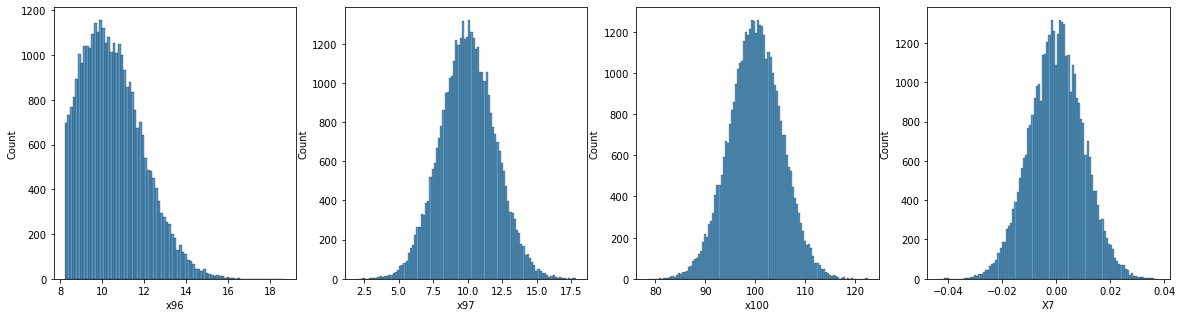

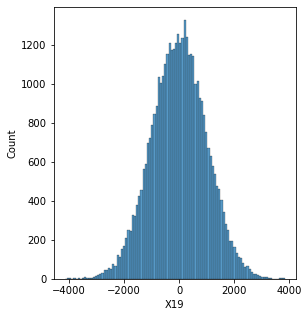

In [16]:
#Checking distributions

fig = plt.figure(figsize=(20,5))

for plots, column in enumerate(data.select_dtypes(['float','int'])):

    if plots%4==0 and plots != 0:
        plt.show()
        fig = plt.figure(figsize=(20,5))

    fig.add_subplot(1,4,(plots%4)+1)
    sns.histplot(data=data[column])

    plt.xlabel(column)

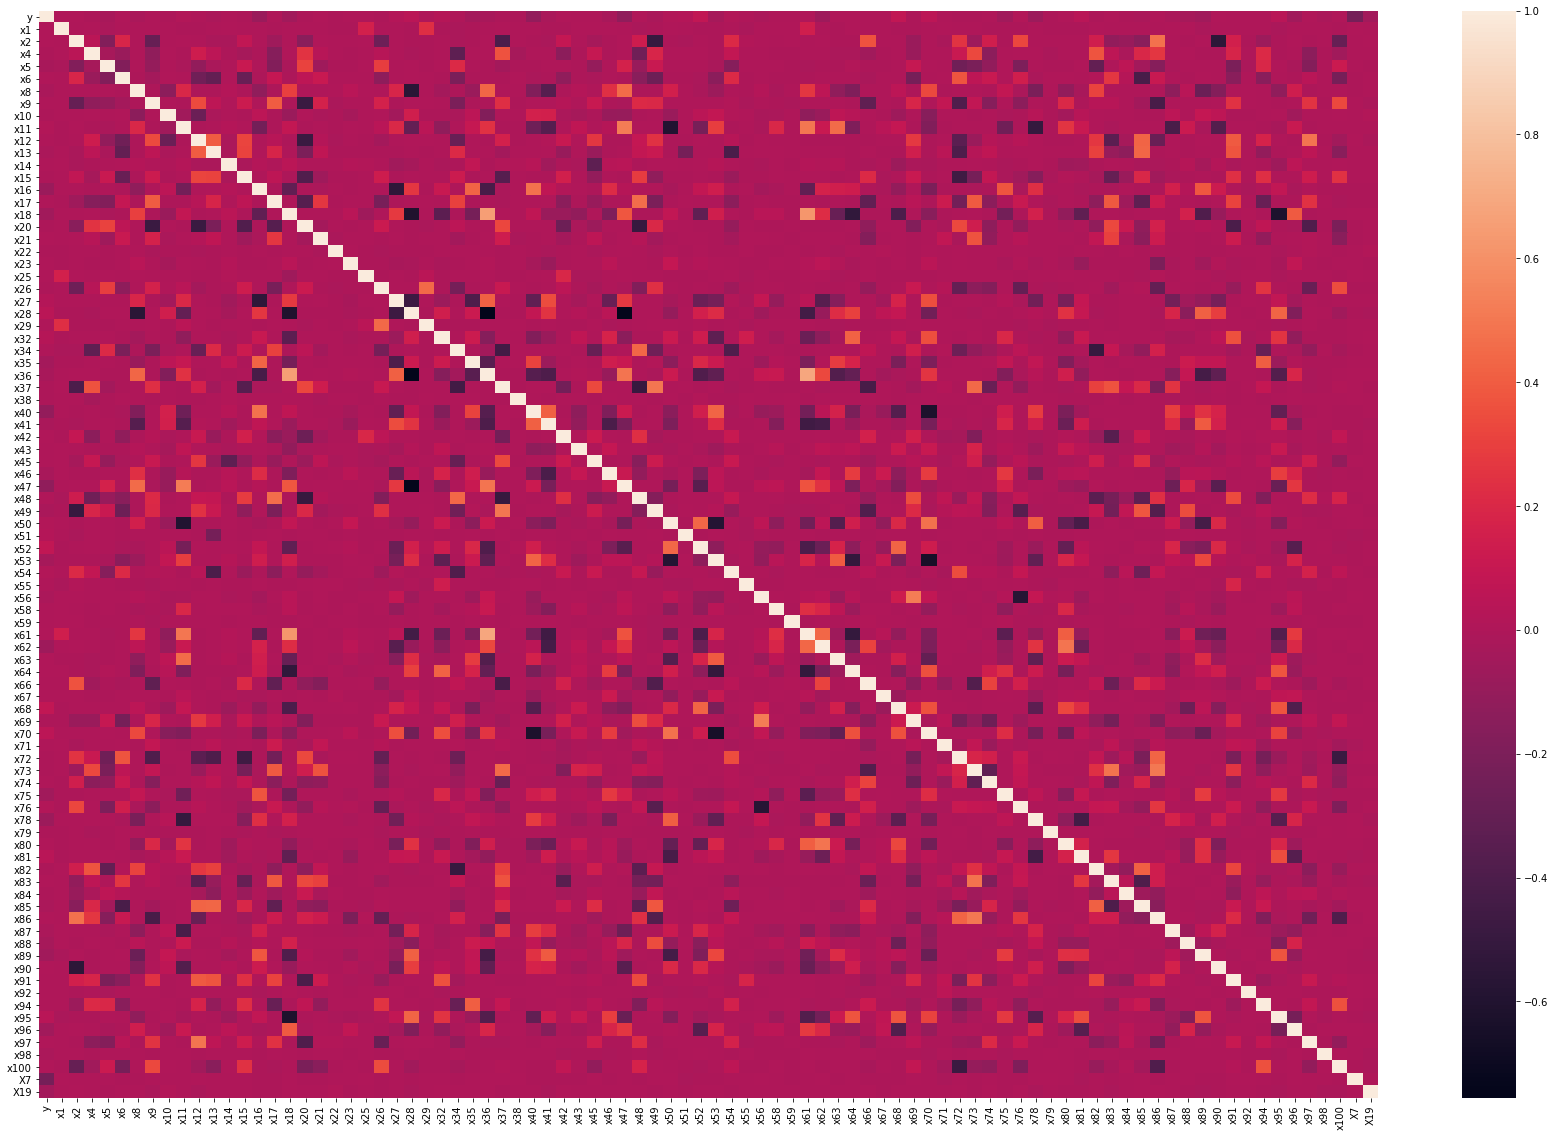

In [17]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr());

In [19]:
#Function to fix the test data
def pipeline(data):
    #Dropping bad columns
    data.drop(columns=['x30','x44','x57','x39'], inplace=True)
    #Converting numeric values to float
    import re 
    data['X7']= [round(float(re.sub(u"\u2212", "-", i.strip('%'))),8) for i in data['x7']]
    data['X19']= [round(float(re.sub(u"\u2212", "-", i.strip('$'))),10) for i in data['x19']]
    #Converting categories
    data = data.astype({'x24':'category','x31':'category','x3':'category','x33':'category','x60':'category','x65':'category','x77':'category','x93':'category','x99':'category'})
    #Addressing inconsistencies in x3
    data.x3.replace({'Fri': 'Friday',
     'Mon': 'Monday',
     'Sat': 'Saturday',
     'Sun': 'Sunday',
     'Thur': 'Thursday',
     'Tue': 'Tuesday',
     'Wed': 'Wednesday'}, inplace=True)
    #Addressing variable x99
    data.x99 = data.x99.cat.add_categories(['no'])
    data.x99.fillna('no', inplace=True)
    return data

# Modeling

For our models, we will try:
- LogisticRegression
- RandomForestClassifier

## LogisticRegression

First, let's get a baseline for our model. Let's run a model where we drop all the missing values from our data and see what out AUC looks like:

In [21]:
#df = pd.get_dummies(data.select_dtypes(['category']))
df = pd.concat([data.select_dtypes(['number']),pd.get_dummies(data.select_dtypes(['category'])) ],axis=1)

In [22]:
df_drop_na = df.dropna()
X = df_drop_na.drop(columns='y')
y = df_drop_na.y

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=200).fit(X_train, y_train)

In [25]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
metrics.auc(fpr, tpr)

0.7692307692307692

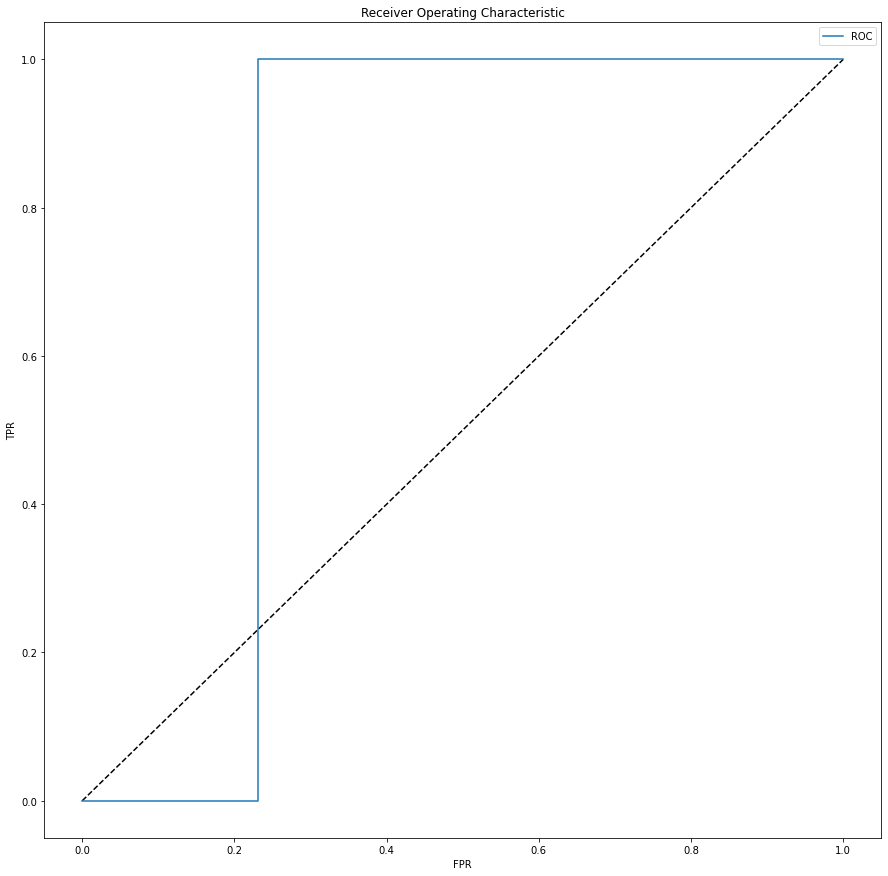

In [26]:
plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= "ROC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

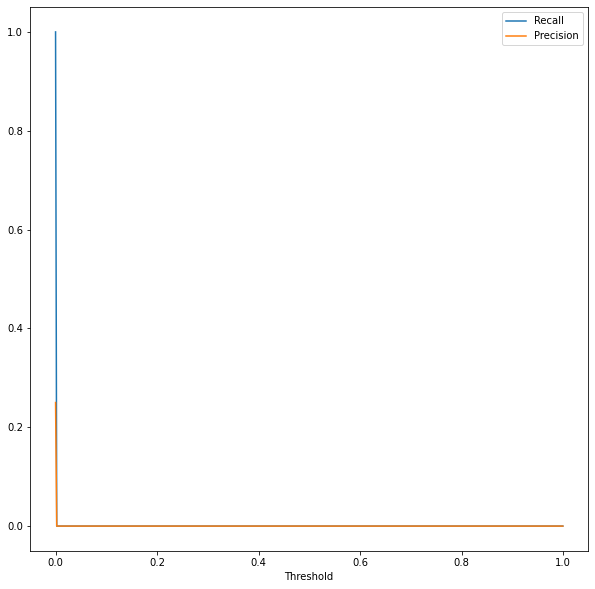

In [27]:
from sklearn.metrics import precision_recall_curve, accuracy_score
precision, recall, threshold = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize = (10,10))
plt.plot(threshold,recall[:-1],label='Recall')
plt.plot(threshold,precision[:-1],label="Precision")
plt.legend()
plt.xlabel('Threshold')
plt.show()

In [28]:
accuracy_score(y_test, clf.predict(X_test))

0.7857142857142857

In [38]:
#Selecting best Threshold

def best_threshold(y_test,y_pred,precision, recall, threshold):
    from sklearn.metrics import accuracy_score
    accuracy_thresh = list()
    for thres in threshold:
        accuracy_thresh.append(accuracy_score(y_test, np.where(y_pred>thres,1,0), normalize = True))
    
    accuracy_thresh = pd.concat([pd.Series(threshold),pd.Series(precision), pd.Series(recall), pd.Series(accuracy_thresh)], axis = 1)
    accuracy_thresh.columns = ['threshold','precision','recall','accuracy']
    accuracy_thresh.sort_values(by='accuracy', ascending= False, inplace=True)
    return accuracy_thresh.head()

In [40]:
best_threshold(y_test,clf.predict_proba(X_test)[:,1],precision, recall, threshold)

,threshold,precision,recall,accuracy
3,0.999635,0.00,0.0,0.928571
2,0.999301,0.00,0.0,0.857143
1,0.002352,0.00,0.0,0.785714
0,0.000066,0.25,1.0,0.714286
4,NaN,1.00,0.0,NaN


As we can see, our AUC score is 0.77 and our accuracy is 78.6% for a threshold of 0.5, however, for a threshold of 0.999635 we get an accuracy of 92.86%, but precision and recall equal to zero. Our model would only be predicting positive labels if the probability is almost 100%. This is our baseline.

Now, let's impute the missing values using KNearestNeighbors and scale our values using MinMaxScaler:





In [41]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_imputed = pd.DataFrame(np.round(imputer.fit_transform(df),10), columns=['y',
 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26','x27', 'x28', 'x29', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38',
 'x40', 'x41', 'x42', 'x43', 'x45', 'x46','x47', 'x48', 'x49','x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73',
 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100', 'X7', 'X19', 'x24_female', 'x24_male', 'x31_no',
 'x31_yes', 'x33_Alabama', 'x33_Alaska', 'x33_Arizona', 'x33_Arkansas', 'x33_California', 'x33_Colorado', 'x33_Connecticut', 'x33_DC', 'x33_Delaware', 'x33_Florida', 'x33_Georgia', 'x33_Hawaii', 'x33_Idaho', 'x33_Illinois',
 'x33_Indiana', 'x33_Iowa', 'x33_Kansas', 'x33_Kentucky', 'x33_Louisiana', 'x33_Maine', 'x33_Maryland', 'x33_Massachusetts', 'x33_Michigan', 'x33_Minnesota', 'x33_Mississippi', 'x33_Missouri', 'x33_Montana',
 'x33_Nebraska', 'x33_Nevada', 'x33_New Hampshire', 'x33_New Jersey', 'x33_New Mexico', 'x33_New York', 'x33_North Carolina', 'x33_North Dakota', 'x33_Ohio', 'x33_Oklahoma', 'x33_Oregon', 'x33_Pennsylvania', 'x33_Rhode Island',
 'x33_South Carolina', 'x33_South Dakota', 'x33_Tennessee', 'x33_Texas', 'x33_Utah', 'x33_Vermont', 'x33_Virginia', 'x33_Washington', 'x33_West Virginia', 'x33_Wisconsin', 'x33_Wyoming', 'x60_April', 'x60_August', 'x60_December',
 'x60_February', 'x60_January', 'x60_July', 'x60_June', 'x60_March', 'x60_May', 'x60_November', 'x60_October', 'x60_September', 'x65_allstate', 'x65_esurance', 'x65_farmers', 'x65_geico', 'x65_progressive', 'x77_buick',
 'x77_chevrolet', 'x77_ford', 'x77_mercedes', 'x77_nissan', 'x77_subaru', 'x77_toyota', 'x93_no', 'x93_yes', 'x99_yes', 'x99_no'])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_imputed)
df_scaled = pd.DataFrame(scaler.transform(df_imputed), columns=['y',
 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26','x27', 'x28', 'x29', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38',
 'x40', 'x41', 'x42', 'x43', 'x45', 'x46','x47', 'x48', 'x49','x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73',
 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100', 'X7', 'X19', 'x24_female', 'x24_male', 'x31_no',
 'x31_yes', 'x33_Alabama', 'x33_Alaska', 'x33_Arizona', 'x33_Arkansas', 'x33_California', 'x33_Colorado', 'x33_Connecticut', 'x33_DC', 'x33_Delaware', 'x33_Florida', 'x33_Georgia', 'x33_Hawaii', 'x33_Idaho', 'x33_Illinois',
 'x33_Indiana', 'x33_Iowa', 'x33_Kansas', 'x33_Kentucky', 'x33_Louisiana', 'x33_Maine', 'x33_Maryland', 'x33_Massachusetts', 'x33_Michigan', 'x33_Minnesota', 'x33_Mississippi', 'x33_Missouri', 'x33_Montana',
 'x33_Nebraska', 'x33_Nevada', 'x33_New Hampshire', 'x33_New Jersey', 'x33_New Mexico', 'x33_New York', 'x33_North Carolina', 'x33_North Dakota', 'x33_Ohio', 'x33_Oklahoma', 'x33_Oregon', 'x33_Pennsylvania', 'x33_Rhode Island',
 'x33_South Carolina', 'x33_South Dakota', 'x33_Tennessee', 'x33_Texas', 'x33_Utah', 'x33_Vermont', 'x33_Virginia', 'x33_Washington', 'x33_West Virginia', 'x33_Wisconsin', 'x33_Wyoming', 'x60_April', 'x60_August', 'x60_December',
 'x60_February', 'x60_January', 'x60_July', 'x60_June', 'x60_March', 'x60_May', 'x60_November', 'x60_October', 'x60_September', 'x65_allstate', 'x65_esurance', 'x65_farmers', 'x65_geico', 'x65_progressive', 'x77_buick',
 'x77_chevrolet', 'x77_ford', 'x77_mercedes', 'x77_nissan', 'x77_subaru', 'x77_toyota', 'x93_no', 'x93_yes', 'x99_yes', 'x99_no'])

In [43]:
X = df_scaled.drop(columns='y')
y = df_scaled.y

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42,max_iter=1000).fit(X_train, y_train)

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
print(f'AUC: {metrics.auc(fpr, tpr)}')

AUC: 0.7573663713310392


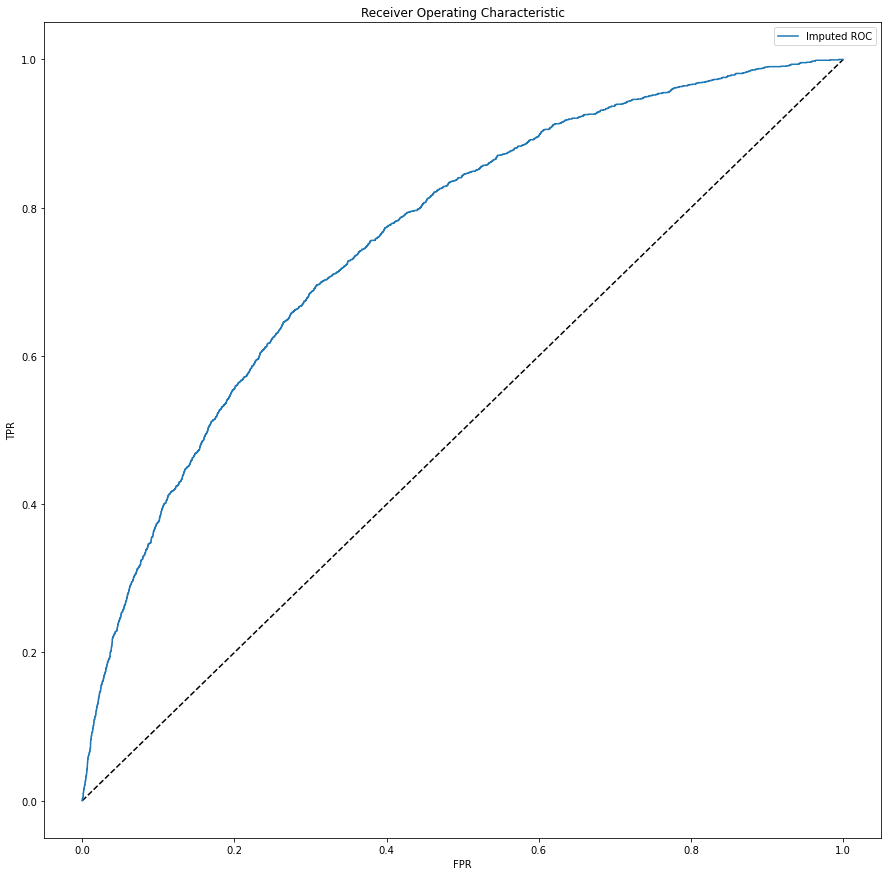

In [46]:
plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= "Imputed ROC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

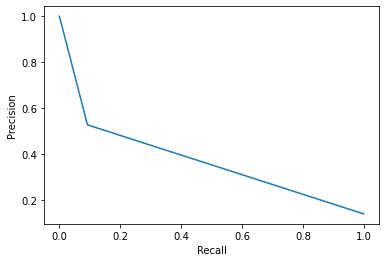

In [47]:
precision, recall, threshold = precision_recall_curve(y_test, clf.predict(X_test))  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [48]:
accuracy_score(y_test, clf.predict(X_test))

0.8607575757575757

In [49]:
best_threshold(y_test,clf.predict_proba(X_test)[:,1],precision, recall, thresholds)

,threshold,precision,recall,accuracy
146,0.501635,NaN,NaN,0.861439
142,0.507063,NaN,NaN,0.861364
137,0.510385,NaN,NaN,0.861288
136,0.510886,NaN,NaN,0.861288
139,0.509948,NaN,NaN,0.861288


## RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_c = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_c.fit(X_train, y_train)
y_pred_c = rf_c.predict(X_test)

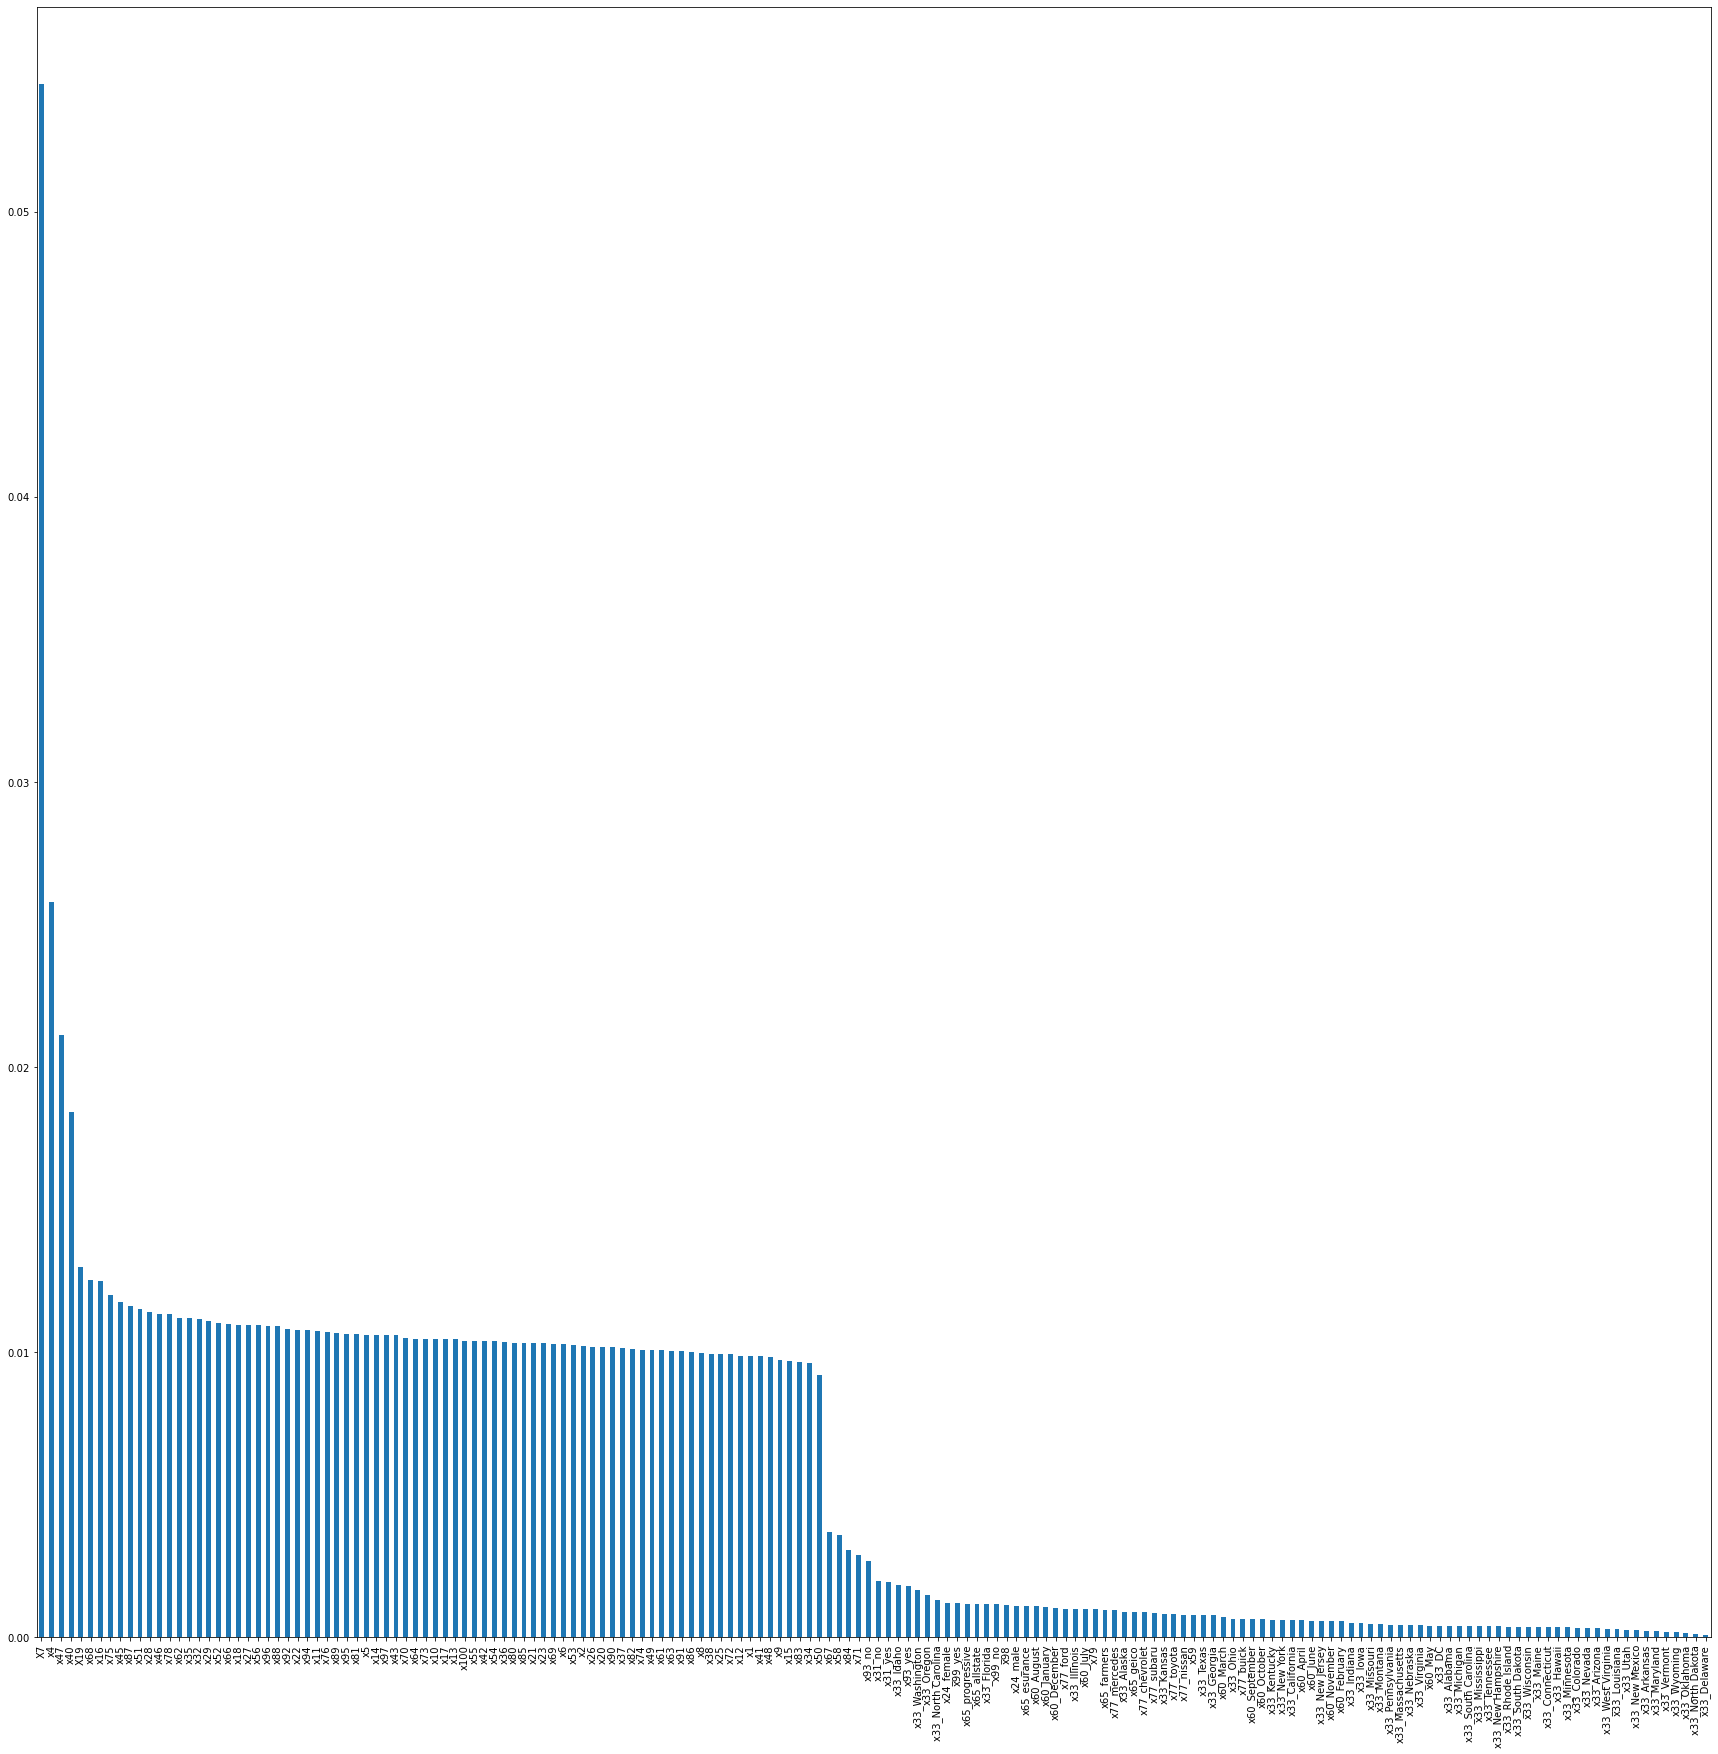

In [51]:
plt.figure(figsize=(30,30))
pd.Series(rf_c.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:200].plot(kind='bar');

In [52]:
score = classification_report(y_test, y_pred_c)
print(score)

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     11344
         1.0       0.56      0.00      0.01      1856

    accuracy                           0.86     13200
   macro avg       0.71      0.50      0.47     13200
weighted avg       0.82      0.86      0.80     13200



In [53]:
from sklearn.model_selection import GridSearchCV
params_grid = {'bootstrap': [True, False],
               'max_depth': [10, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [5,50,100],
               'n_estimators': [100,1000]}
rf_grid_new = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_grid_new = GridSearchCV(rf_grid_new, params_grid, cv = 2, verbose=2, n_jobs = -1)

In [54]:
rf_grid_new.fit(X_train,y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 50, 100],
                         'n_estimators': [100, 1000]},
             verbose=2)

In [55]:
print(rf_grid_new.best_params_)
print(rf_grid_new.best_estimator_.score(X_test,y_test))
print(rf_grid_new.best_estimator_)

{'bootstrap': False, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 100}
0.8598484848484849
RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)


In [56]:
from sklearn.model_selection import cross_validate
rf_best_cv_results = cross_validate(rf_grid_new.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.85381688, 0.85436024, 0.85324079])

In [57]:
print(classification_report(y_test, rf_grid_new.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     11344
         1.0       0.67      0.01      0.01      1856

    accuracy                           0.86     13200
   macro avg       0.76      0.50      0.47     13200
weighted avg       0.83      0.86      0.80     13200



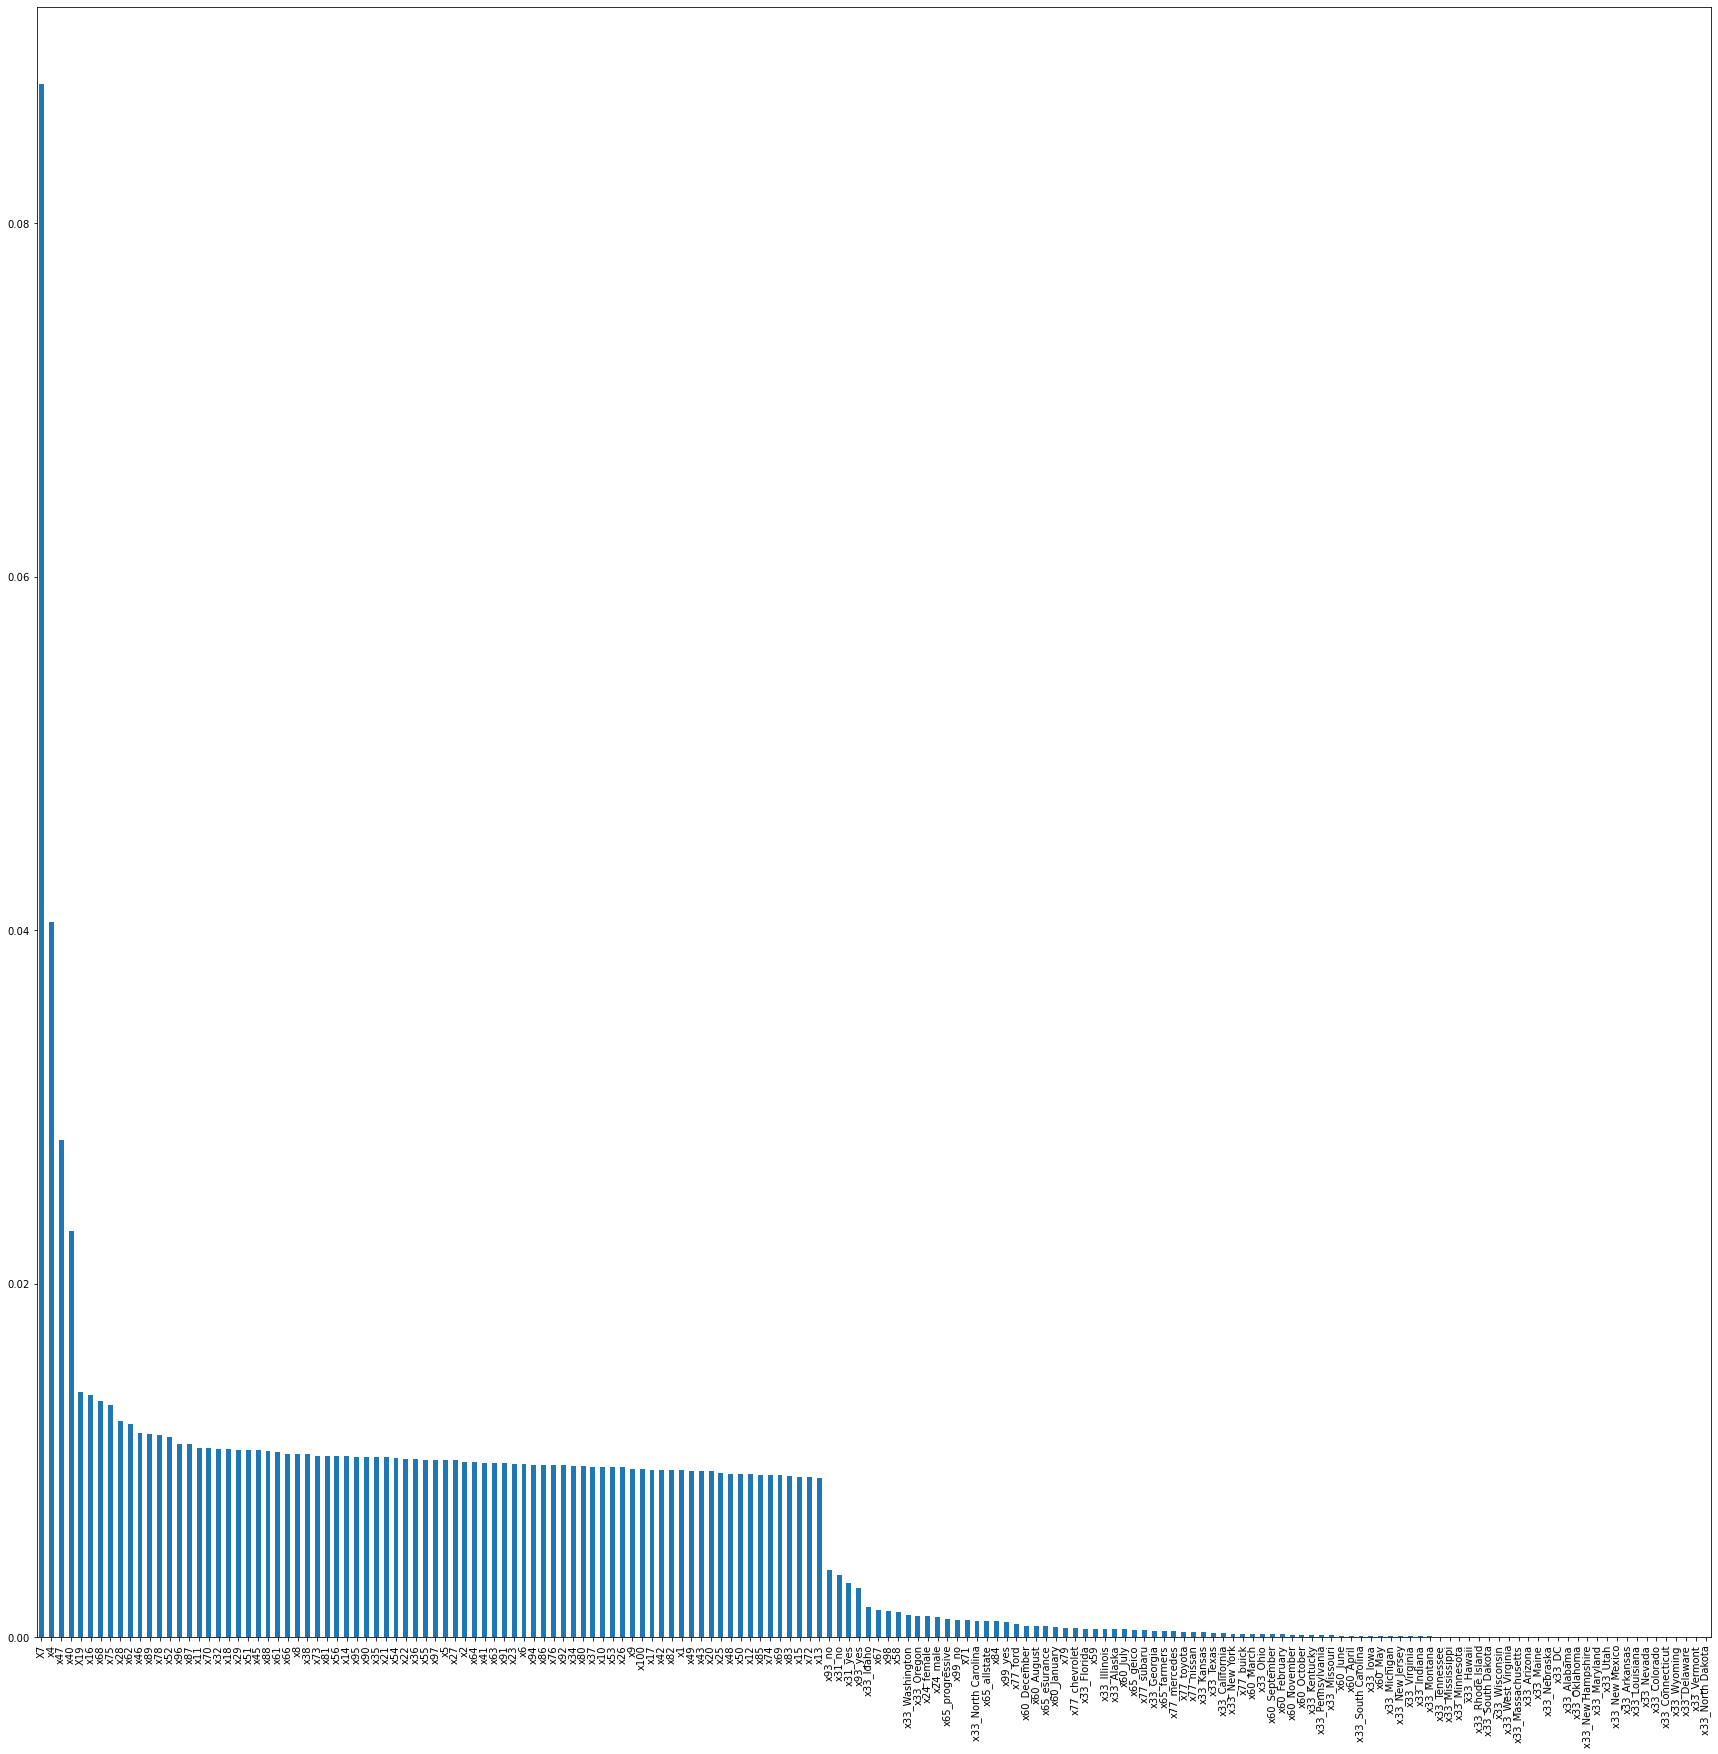

In [58]:
plt.figure(figsize=(30,30))
pd.Series(rf_grid_new.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:200].plot(kind='bar');

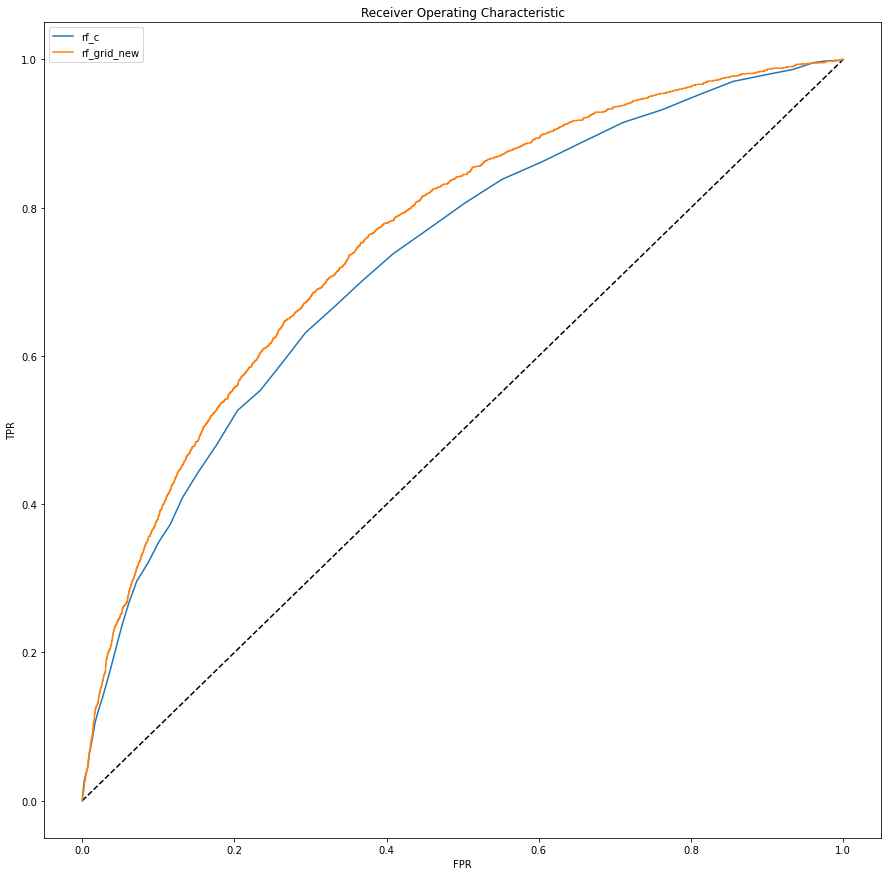

In [59]:
fpr_rfc , tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, rf_c.predict_proba(X_test)[:,1],pos_label=1)



fpr_rfgrid , tpr_rfgrid, thresholds_rfgrid = metrics.roc_curve(y_test, rf_grid_new.predict_proba(X_test)[:,1],pos_label=1)

plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_rfc , tpr_rfc, label= "rf_c")
plt.plot(fpr_rfgrid , tpr_rfgrid, label= "rf_grid_new")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

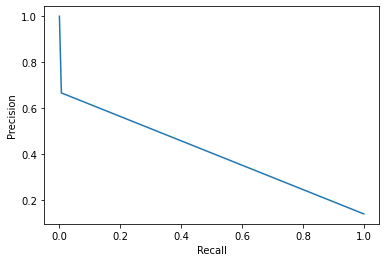

In [60]:
precision, recall, threshold = precision_recall_curve(y_test, rf_grid_new.predict(X_test))  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [61]:
best_threshold(y_test,rf_grid_new.predict_proba(X_test)[:,1], precision, recall,threshold)

,threshold,precision,recall,accuracy
1,1.0,0.666667,0.006466,0.859394
0,0.0,0.140606,1.000000,0.140606
2,NaN,1.000000,0.000000,NaN


# Conclusions

- For this model, we are using data we do not fully understand. Therefore we used accuracy as our main metric to determine model performance. In a real-world scenario, I would want to understant the goal for the model to select more adequate metrics. Precision/Recall are usually better, depending on the use case. For example: If this model was to be used to determined best candidates for email ads, then I'd say we'd want a higher Recall, given that this ad campaign would not cost too much money, and if we have false positives, it wouldn't really matter. On the other hand, if the ad campaign was more expensive, then we'd want more True Positives, therefore, Presicion would be a better metric. After knowing the use case, a threshold for the best result can be selected.